In [1]:
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def mid(npArr):
    return npArr.sum() / len(npArr)

#Расчет косвенной погрешности, если величина - произведение и частное данных
def sigma_mulls(val, sigsArr, parmsArr):
    sum = 0
    for i in range(len(sigsArr)):
        sum += (sigsArr[i] / parmsArr[i])**2
    return val * (sum)**0.5


#Расчет случайной погрешности среднего
def sigma_rand(valsArr):
    N = len(valsArr)
    valMid = sum(valsArr) / N
    msum = 0
    for val in valsArr:
        msum += (val - valMid)**2
        
    return (msum / (N * (N - 1))) ** 0.5


#MNK если y = kx
##DEPRECATED
def k_only(x, y):
    return mid(x * y) / mid(x * x)

##DEPRECATED
def k_only_sigma(x, y):
    return ((mid(x * x) * mid(y * y) - mid(x * y)**2) / (len(x) * mid(x * x)**2))**0.5

#MNK для y = kx + a
def k_coef(x, y):
    return (mid(x * y) - mid(x) * mid(y)) / (mid(x * x) - mid(x)**2)

def b_coef(x, y):
    return mid(y) - k_coef(x, y) * mid(x)

def k_sigma(x, y):
    return ((mid(y * y) - mid(y)**2) / (mid(x * x) - mid(x)**2) - k_coef(x, y)**2)**0.5  / len(x)**0.5

def b_sigma(x, y):
    return k_sigma(x, y) * (mid(x**2) - mid(x)**2)**0.5

In [2]:

ms = np.array([69.95, 92.837])
errsm = np.array([0.74, 0.92])
Bps = np.array([5.887, 7.813, 2.8])
errsBp = np.array([0.3, 0.256, 0.14])
d = 0.575
V = 4 / 3 * math.pi * (d / 2)**3

Ms = 3 / 8 / math.pi * Bps
errsM = Ms * (errsBp / Bps)

Brs = 1.5 * Bps 
errsBr = Brs * (errsBp / Bps)

for i in range(3):
    print (Brs[i], errsBr[i])

8.8305 0.45
11.7195 0.384
4.2 0.21


In [3]:
Ts = np.array([63.85, 57.91, 53.47, 46.9, 41.25, 36.78, 46.31, 50.08, 39.91, 46.35])
Ns = np.array([20., 20., 20., 20., 20., 20., 30., 40., 40., 60.])
Cnt = np.linspace(12, 3, 12 - 2)
errsT = 0.4 / Ns
Ts = Ts / Ns
print(Ts)

k = k_coef(Cnt, Ts)
b = b_coef(Cnt, Ts)

[ 3.1925      2.8955      2.6735      2.345       2.0625      1.839
  1.54366667  1.252       0.99775     0.7725    ]


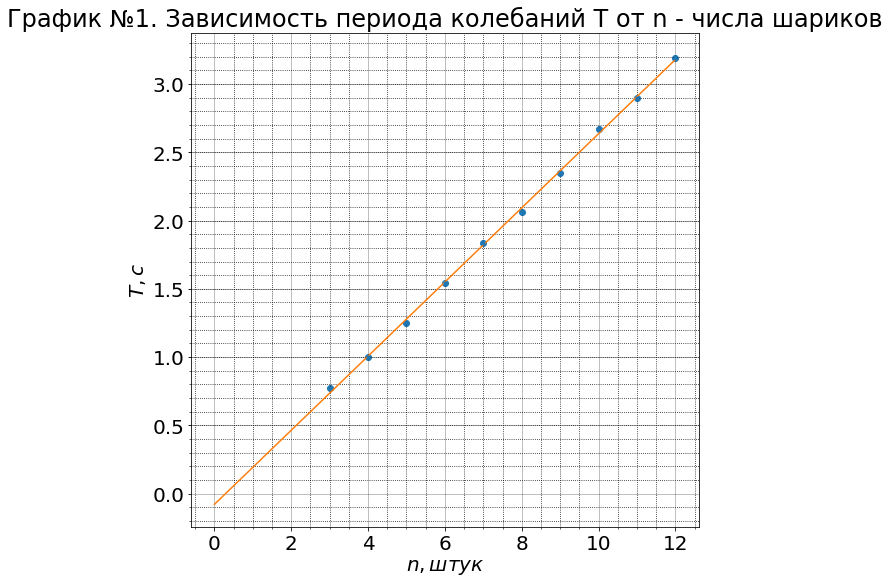

0.271510606061 0.00259275532307


In [4]:
mpl.rcParams['font.size'] = 20 # Управление стилем, в данном случаем - размером шрифта 
    
# y = b + k

# объекты управления графиком
#fig, ax = plt.subplots()
plt.figure("имя1", figsize=(20, 20))

ax = plt.subplot(221)
# Подписываем оси и график
ax.set_title(r"График №1. Зависимость периода колебаний T от n - числа шариков")
ax.set_ylabel(r"$T, c$")
ax.set_xlabel(r"$n, штук$")
#fig.set_figwidth(12)
#fig.set_figheight(12)
# Нанесём точки на график
ax.scatter(Cnt, Ts)

twoX = np.linspace(0, 12, 2)
twoY = k * twoX + b

ax.errorbar(Cnt, Ts, yerr=errsT, xerr=0, fmt='.') 
ax.plot(twoX, twoY)#, label=r'T = %f * C + %f'%(k, b), linestyle=mStyle[3])
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 0.5,
       alpha = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

mStyle = ['--', '-', '-.', ':']  # - возможные стили линий, строим графики в чб forever

plt.legend()
#plt.savefig('Зависимость периода от ёмкости.png') # Если нужно сохранить график из кода
plt.show()


print(k, k_sigma(Cnt, Ts))


In [5]:
sigma_mulls(0.13366, [0.0001, 0.006, 0.92, 0.006], [0.848, (0.575/2), 92.837, 0.272])

0.004269488980037874

In [6]:


ms = np.array([0.265, 0.191, 0.162, 0.203, 0.232])
ns = np.linspace(12, 4, 5)
Ls = np.array([3., 3., 3., 2., 1.]) * d

Ms = ms * 980.66 * Ls
errsM = Ms * ((0.005/ms)**2 + (0.006 / 0.525)**2)**0.5
k = k_coef(ns, Ms)
b = b_coef(ns, Ms)
errsM

array([ 9.88881645,  9.22910361,  9.01943001,  6.2162338 ,  3.19128267])

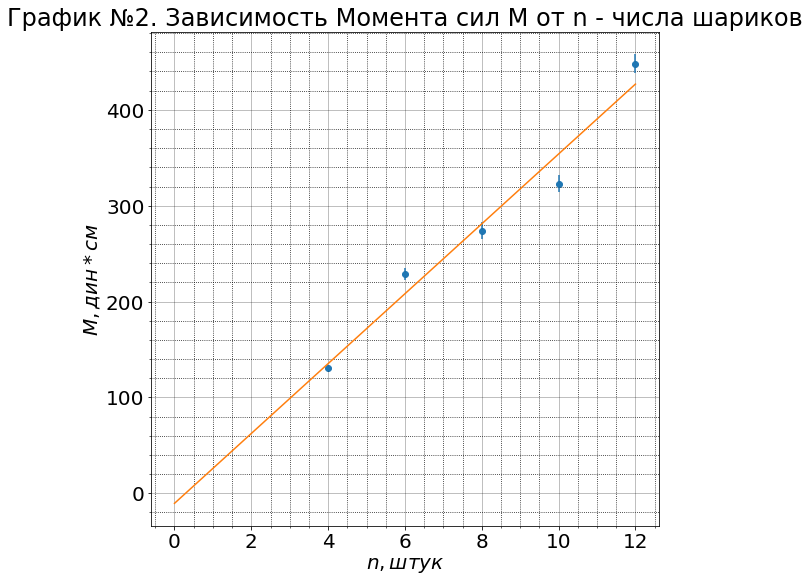

In [7]:
mpl.rcParams['font.size'] = 20 # Управление стилем, в данном случаем - размером шрифта 
    
# y = b + k

# объекты управления графиком
#fig, ax = plt.subplots()
plt.figure("имя1", figsize=(20, 20))

ax = plt.subplot(221)
# Подписываем оси и график
ax.set_title(r"График №2. Зависимость Момента сил М от n - числа шариков")
ax.set_ylabel(r"$М, дин * см$")
ax.set_xlabel(r"$n, штук$")
#fig.set_figwidth(12)
#fig.set_figheight(12)
# Нанесём точки на график
ax.scatter(ns, Ms)

twoX = np.linspace(0, 12, 2)
twoY = k * twoX + b

ax.errorbar(ns, Ms, yerr=errsM, xerr=0, fmt='.') 
ax.plot(twoX, twoY)#, label=r'T = %f * C + %f'%(k, b), linestyle=mStyle[3])
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 0.5,
       alpha = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

mStyle = ['--', '-', '-.', ':']  # - возможные стили линий, строим графики в чб forever

plt.legend()
#plt.savefig('Зависимость периода от ёмкости.png') # Если нужно сохранить график из кода
plt.show()

In [8]:
print(k, k_sigma(ns, Ms))

36.454809675 3.09165930548


In [9]:
sigma_mulls(0.393, [3.092, 0.92], [36.455, 92.837])

0.03355978640825914